In [1]:
pip install numpy


In [2]:
pip install matplotlib


In [3]:
pip install seaborn


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
# firstly , we are defining our dataset
dataset = [2,3,4,5,6,6,7,8,7,8,8,9,9,8,0,11,12,13,22,2,15,15,16, 26 , 30, 120]
print(len(dataset))


26


(array([17.,  6.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

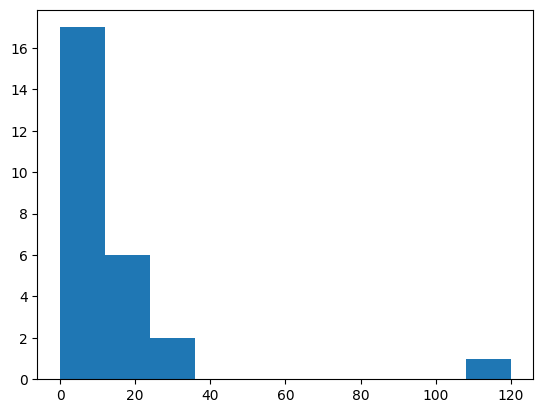

In [7]:
plt.hist(dataset)

In [8]:
# z_score
# definig the function for detecting the outliers
outliers = []
def detect_outliers(data):
  threshold = 3  # 3 is standard deviation
  mean = np.mean(data)
  std = np.std(data)

  print(mean,std)

  for i in data:
    z_score = (i-mean)/std

    if np.abs(z_score)> threshold:
      outliers.append(i)

  return outliers


#calling the funtion

detect_outliers(dataset)



14.307692307692308 22.29482387455961


[120]

###IQR Is the most efficient way to find the outliers
### sort the dataset
###calculate  Q1(25%) and Q3(75%)
###IQR(Q3-Q1)
### find the lower_fence(Q1-1.5(IQR))
### find the higher_fence(Q3+1.5(IQR))

In [9]:
# sorting the dataset

sort =sorted(dataset)
print(sort)

[0, 2, 2, 3, 4, 5, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 11, 12, 13, 15, 15, 16, 22, 26, 30, 120]


In [10]:

# we have a direct farmula for finding Q1 and Q3

q1,q3 = np.percentile(dataset,[25,75])
print(q1, q3)

6.0 14.5


In [11]:
# finding the IQR
iqr = q3-q1
print(iqr)

8.5


In [12]:
# find the lower_fence and higher fence
lower_fence = q1-(1.5*iqr)
higher_fence = q3+(1.5*iqr)

print(lower_fence , higher_fence)

-6.75 27.25


In [14]:
outliers = []
for i in sort:
  if i<lower_fence or i>higher_fence:
    outliers.append(i)
print(outliers)

[30, 120]
